In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# **Importing Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
ENStopWords=nltk.corpus.stopwords.words("english")
lemmatizer=nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()


# **Dataset**

In [4]:
data=pd.read_csv("/content/combined_data.csv")
data

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...
...,...,...
83443,0,hi given a date how do i get the last date of ...
83444,1,now you can order software on cd or download i...
83445,1,dear valued member canadianpharmacy provides a...
83446,0,subscribe change profile contact us long term ...


In [5]:
data.shape

(83448, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [7]:
data.isnull().value_counts()

label  text 
False  False    83448
Name: count, dtype: int64

In [8]:
np.sum(data.duplicated())

0

In [9]:
data['label'].value_counts()

label
1    43910
0    39538
Name: count, dtype: int64

In [10]:
data['label'].value_counts(normalize=True)

label
1    0.526196
0    0.473804
Name: proportion, dtype: float64

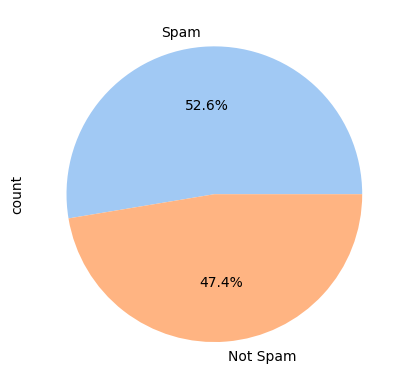

In [13]:
#mapping numeric labels to corresponding categories
label_mapping={1:"Spam" ,0:"Not Spam"}
data["categorical_label"]=data['label'].map(label_mapping)

# Define pastel palette
pastel_palette = sns.color_palette('pastel')

# Set the pastel palette
sns.set_palette(pastel_palette)

# Plotting the pie chart
data['categorical_label'].value_counts().plot.pie(labels=['Spam', 'Not Spam'], autopct='%1.1f%%')
plt.show()

<ipython-input-15-9876540a3dab>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='label', palette=pastel_palette)
<ipython-input-15-9876540a3dab>:8: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=data, x='label', palette=pastel_palette)


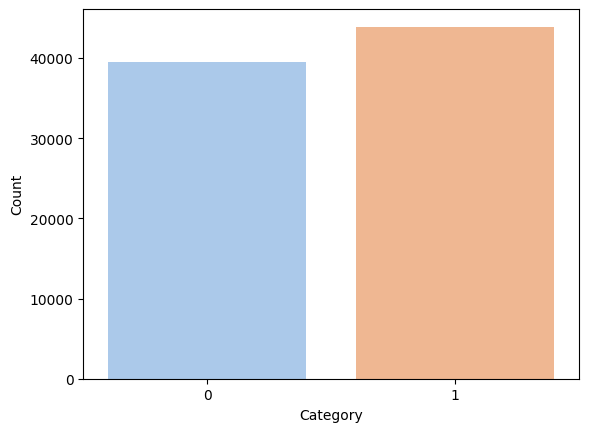

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define pastel palette
pastel_palette = sns.color_palette('pastel')

# Creating the count plot with pastel colors
sns.countplot(data=data, x='label', palette=pastel_palette)

# Adding labels
plt.xlabel('Category')
plt.ylabel('Count')

# Display the plot
plt.show()


# **Data Preprocessing**

In [16]:
#Definning a function to remove the punctuation
def data_preparation(text):

  no_bunct_text=''.join([char.lower() for char in text if char not in string.punctuation])
  tokens=word_tokenize(no_bunct_text)
  nostop_words_tokens=[word for word in tokens if word not in ENStopWords]
  lemmatized_text=' '.join([lemmatizer.lemmatize(word) for word in nostop_words_tokens])

  return lemmatized_text

data['cleaned_text']=data['text'].map(data_preparation)

In [17]:
data.head()

,label,text,categorical_label,cleaned_text
0,1,ounce feather bowl hummingbird opec moment ala...,Spam,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...,Spam,wulvob get medircations online qnb ikud viagra...
2,0,computer connection from cnn com wednesday es...,Not Spam,computer connection cnn com wednesday escapenu...
3,1,university degree obtain a prosperous future m...,Spam,university degree obtain prosperous future mon...
4,0,thanks for all your answers guys i know i shou...,Not Spam,thanks answer guy know checked rsync manual wo...


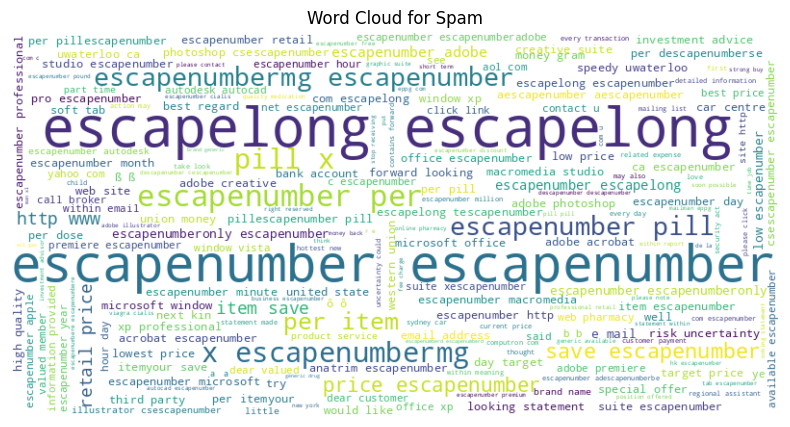

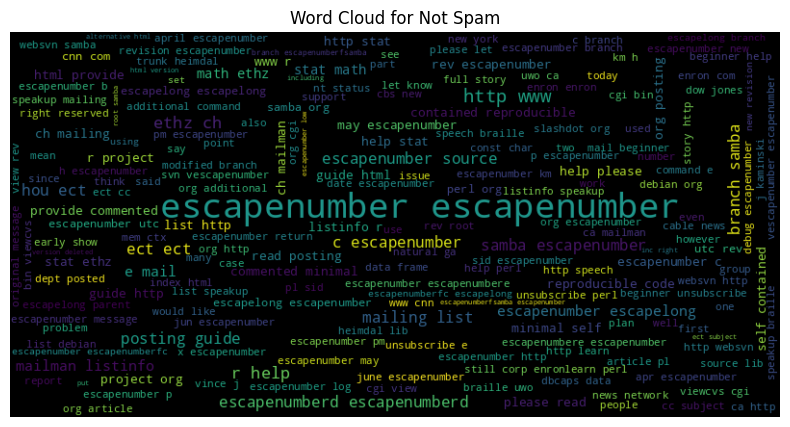

In [19]:
# Filter data for spam and not spam
data_spam = data[data['categorical_label'] == 'Spam']['cleaned_text']
data_not_spam = data[data['categorical_label'] == 'Not Spam']['cleaned_text']

# Function to generate word cloud
def wordcloud_draw(data, title, color='black'):
    words = ' '.join(data)
    wordcloud = WordCloud(stopwords=ENStopWords,
                          background_color=color,
                          width=800,
                          height=400
                          ).generate(words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word cloud for spam
wordcloud_draw(data_spam, 'Word Cloud for Spam', 'white')

# Generate word cloud for not spam
wordcloud_draw(data_not_spam, 'Word Cloud for Not Spam')


<ipython-input-23-79986384a39e>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_word_labels, x=top_word_counts, palette=pastel_palette, ax=ax1)


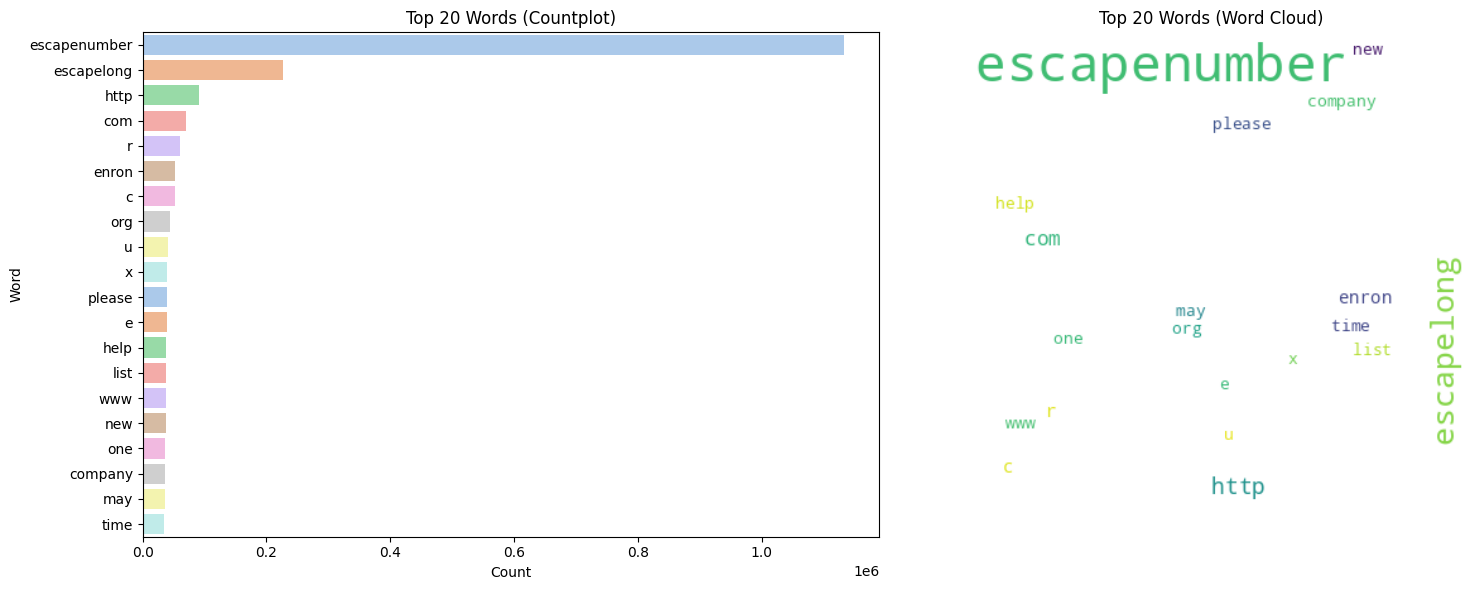

In [23]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Tokenize the text into individual words
all_words = ' '.join(data['cleaned_text']).split()

# Get the most common words and their counts
top_words = Counter(all_words).most_common(20)

# Extract the words and counts
top_word_counts = [pair[1] for pair in top_words]
top_word_labels = [pair[0] for pair in top_words]

# Set the pastel palette
pastel_palette = sns.color_palette("pastel", n_colors=len(top_word_labels))

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Create countplot for top 20 words
sns.barplot(y=top_word_labels, x=top_word_counts, palette=pastel_palette, ax=ax1)
ax1.set_title('Top 20 Words (Countplot)')
ax1.set_xlabel('Count')
ax1.set_ylabel('Word')

# Generate the word cloud for the most common words
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(top_words))

# Plot the word cloud
ax2.imshow(wordcloud, interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Top 20 Words (Word Cloud)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [24]:
x=data['cleaned_text']
y=data['label']

# **Text Transformation**

**Ngram**

In [25]:
Ngramvectorizer=CountVectorizer(ngram_range=(2,2))
X_transformed_ngram=Ngramvectorizer.fit_transform(x)
print("Total number of features:", len(Ngramvectorizer.get_feature_names_out()))

Total number of features: 3688857


**TFIDF**

In [26]:
Tfidfvectorizer=TfidfVectorizer()
X_transformed_tfidf=Tfidfvectorizer.fit_transform(x)

# Print the total number of features
print("Total number of features:", len(Tfidfvectorizer.get_feature_names_out()))



Total number of features: 303983


# **Splitting the data**

In [27]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_transformed_tfidf, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# **Training the models**

In [28]:

# Initialize models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(solver='lbfgs', max_iter=1000),
    "Random Forest": RandomForestClassifier()
}

# Dictionary to store training and validation accuracies
accuracies = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model on the training set
    model.fit(X_train, y_train)

    # Predict labels for the training set
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Predict labels for the validation set
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    # Store accuracies in the dictionary
    accuracies[name] = {
        'Train Accuracy': train_accuracy,
        'Validation Accuracy': val_accuracy
    }

    # Print the model's accuracies
    print(f"{name} Train Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Print accuracies dictionary
print("\nAccuracies:")
print(accuracies)


Naive Bayes Train Accuracy: 0.9814, Validation Accuracy: 0.9771
Logistic Regression Train Accuracy: 0.9891, Validation Accuracy: 0.9861
Random Forest Train Accuracy: 0.9999, Validation Accuracy: 0.9819

Accuracies:
{'Naive Bayes': {'Train Accuracy': 0.9814404266155368, 'Validation Accuracy': 0.9771120431396045}, 'Logistic Regression': {'Train Accuracy': 0.9891398783666377, 'Validation Accuracy': 0.986099460754943}, 'Random Forest': {'Train Accuracy': 0.9998651846969652, 'Validation Accuracy': 0.9819053325344518}}


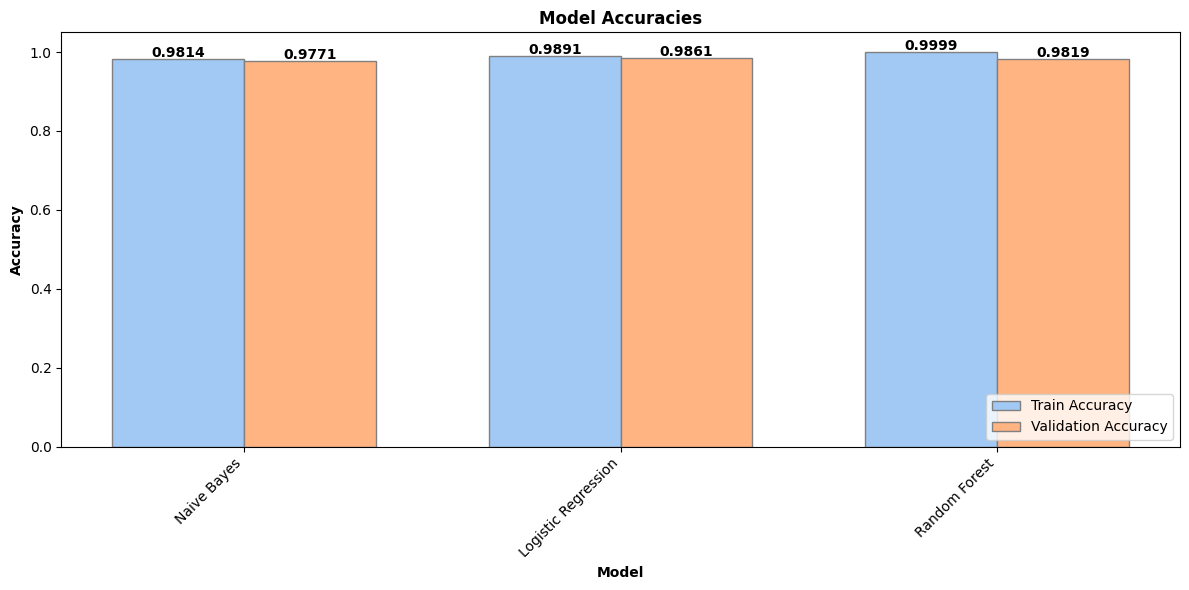

In [29]:
# Define pastel colors
pastel_palette = sns.color_palette("pastel", n_colors=2)

# Extract accuracies
model_names = list(accuracies.keys())
train_accuracies = [accuracies[model]['Train Accuracy'] for model in model_names]
val_accuracies = [accuracies[model]['Validation Accuracy'] for model in model_names]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(model_names))
r2 = [x + bar_width for x in r1]

# Plot accuracies
plt.figure(figsize=(12, 6))
bars1 = plt.bar(r1, train_accuracies, color=pastel_palette[0], width=bar_width, edgecolor='grey', label='Train Accuracy')
bars2 = plt.bar(r2, val_accuracies, color=pastel_palette[1], width=bar_width, edgecolor='grey', label='Validation Accuracy')

# Add accuracy values on the bars
for i, (train_acc, val_acc) in enumerate(zip(train_accuracies, val_accuracies)):
    plt.text(bars1[i].get_x() + bars1[i].get_width() / 2, train_acc + 0.005, f'{train_acc:.4f}', ha='center', color='black', fontweight='bold')
    plt.text(bars2[i].get_x() + bars2[i].get_width() / 2, val_acc + 0.005, f'{val_acc:.4f}', ha='center', color='black', fontweight='bold')

# Add xticks on the middle of the group bars
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(model_names))], model_names, rotation=45, ha='right')

# Add ylabel
plt.ylabel('Accuracy', fontweight='bold')

# Add title
plt.title('Model Accuracies', fontweight='bold')

# Add legend
plt.legend(loc='lower right')

# Show plot
plt.tight_layout()
plt.show()


# **Evaluating the best model**

Random Forest Train Accuracy: 0.9998651846969652
Random Forest Validation Accuracy: 0.9829838226482924
Random Forest Test Accuracy: 0.984661473936489


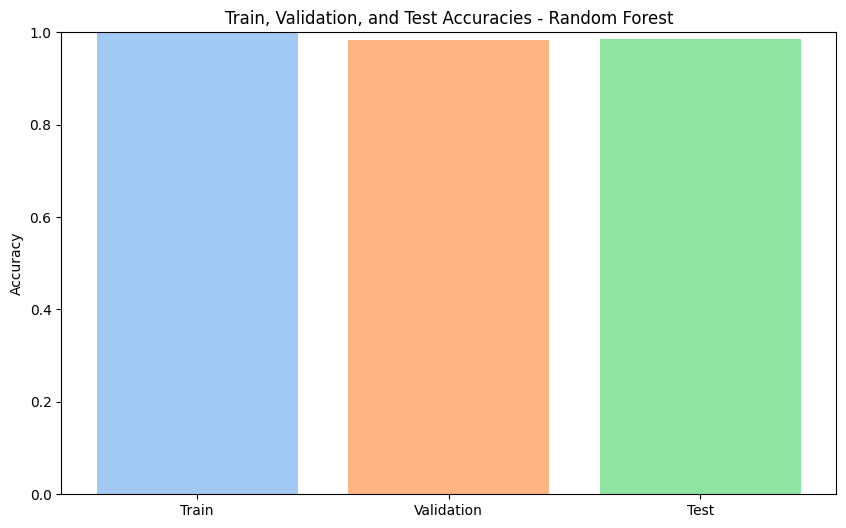

In [30]:
# Initialize Random Forest model
rf_model = RandomForestClassifier()

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predict labels for the train, validation, and test sets
y_train_pred = rf_model.predict(X_train)
y_val_pred = rf_model.predict(X_val)
y_test_pred = rf_model.predict(X_test)

# Calculate train, validation, and test accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Random Forest Train Accuracy:", train_accuracy)
print("Random Forest Validation Accuracy:", val_accuracy)
print("Random Forest Test Accuracy:", test_accuracy)

# Set the pastel palette
sns.set_palette("pastel")

# Plot train, validation, and test accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar([0, 1, 2], [train_accuracy, val_accuracy, test_accuracy], color=sns.color_palette())
plt.xticks([0, 1, 2], ['Train', 'Validation', 'Test'])
plt.ylabel('Accuracy')
plt.title('Train, Validation, and Test Accuracies - Random Forest')
plt.ylim(0, 1)
plt.show()


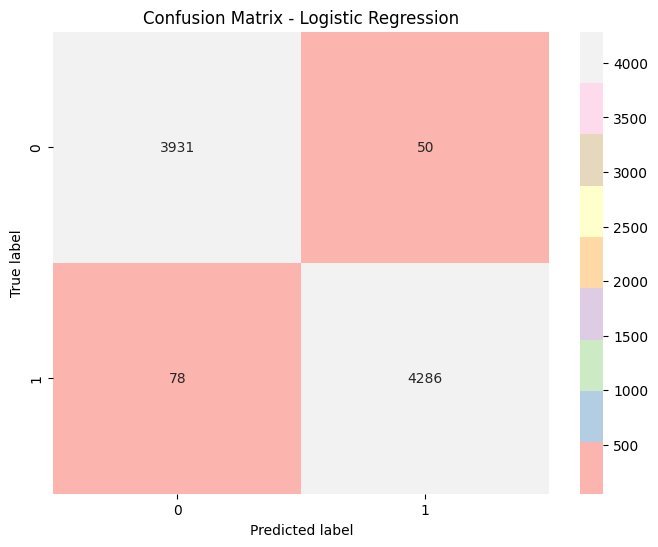

In [34]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix with pastel-like colors
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Pastel1", fmt='g')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
